In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Australian Rainy Weather Prediction
 Dataset:***

*   **Date**

*   **Location:**	49 different locations has been considered.

*   **MinTemp:** Minimum temp in degree celcius

*   **MaxTemp:** Maximum temp in degree celcius

*   **Rainfall:**	The amount of rainfall recorded for the day in mm.

*   **Evaporation:**	Evaporation(mm) in 24hours


*   **Sunshine:**	number of hours of bright sunshine.

*   **WindGustDir:**	The direction of the strongest wind gust in the 24 hours to midnight

*   **WindGustSpeed:**	The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   **WindDir9am, WindDir3pm:**	Direction of wind at 9am and 3pm

*   **WindSpeed9am, WindSpeed3pm:** Speed of wind at 9am and 3pm

*   **Humidity9am, Humidity3pm:** Humidity at 9am and 3pm
*   **Pressure9am, Pressure3pm:** Atmospheric pressure at 9am and 3pm

*   **Cloud9am, Cloud3pm:** Fraction of sky obscured by cloud at 9am

*   **Temp9am, Temp3pm:** Temperature at 9am and 3pm

*   **RainToday:**
         1 = rained today
         0 = didn't rain today
*   **RainTomorrow [Target column]:**          
         
         1 = Will be raining tomorrow
         0 = won't be raining tomorrow





In [ ]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [ ]:
df.shape

(193, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [ ]:
df.nunique()

,0
Soil_Type,3
Sunlight_Hours,188
Water_Frequency,3
Fertilizer_Type,3
Temperature,180
Humidity,189
Growth_Milestone,2


In [ ]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


Growth_Milestone
0    97
1    96
Name: count, dtype: int64


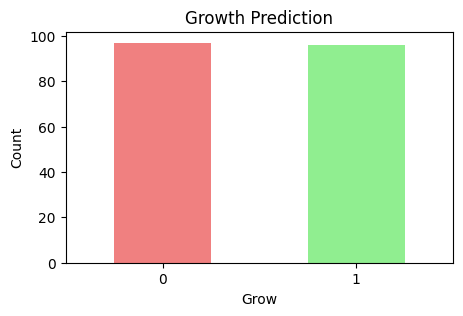

In [ ]:
# Visualize the distribution of the 'RainTomorrow' variable

print(df.value_counts('Growth_Milestone'))

plt.figure(figsize=(5, 3))
df['Growth_Milestone'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Growth Prediction')
plt.xlabel('Grow')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

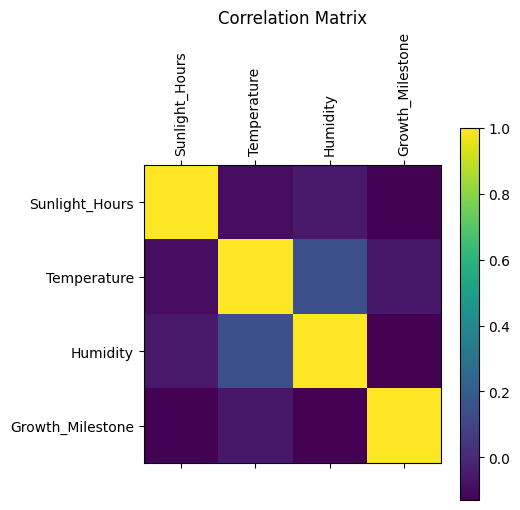

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [ ]:
#droping duplicates
df = df.drop_duplicates()
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
df.shape

(193, 7)

In [ ]:
#checking for total null value for each feature
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [ ]:
#converting categorical variables to numerical by one hot encoding
columns_to_encode = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)
df

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,1,0,0,0,0,0
1,4.033133,28.919484,52.422276,1,0,1,0,1,0,1
2,8.892769,23.179059,44.660539,0,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,0,1,0,0,0,1,0
4,8.374043,NaN,63.625923,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,0,1,1,0,1,0
189,7.528000,30.500000,60.100000,1,0,0,0,1,0,0
190,4.934000,24.500000,61.700000,0,1,0,0,0,1,0
191,8.273000,27.900000,69.500000,1,0,1,1,0,0,1


In [ ]:
# Filling missing values for numerical variables with the mean

numerical_vars = ['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']
for var in numerical_vars:
    df[var].fillna(df[var].mean(), inplace=True)
df

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,1,0,0,0,0,0
1,4.033133,28.919484,52.422276,1,0,1,0,1,0,1
2,8.892769,23.179059,44.660539,0,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,0,1,0,0,0,1,0
4,8.374043,25.017731,63.625923,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,0,1,1,0,1,0
189,7.528000,30.500000,60.100000,1,0,0,0,1,0,0
190,4.934000,24.500000,61.700000,0,1,0,0,0,1,0
191,8.273000,27.900000,69.500000,1,0,1,1,0,0,1


In [ ]:
df.isnull().sum()

,0
Sunlight_Hours,0
Temperature,0
Humidity,0
Growth_Milestone,0
Soil_Type_loam,0
Soil_Type_sandy,0
Water_Frequency_daily,0
Water_Frequency_weekly,0
Fertilizer_Type_none,0
Fertilizer_Type_organic,0


In [ ]:
df.head()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,1,0,0,0,0,0
1,4.033133,28.919484,52.422276,1,0,1,0,1,0,1
2,8.892769,23.179059,44.660539,0,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,0,1,0,0,0,1,0
4,8.374043,25.017731,63.625923,0,0,1,0,0,0,1


In [ ]:
df.shape

(193, 10)

# Implementing AdaBoost using Scikit-learn Library

sklearn AdaBoost reference: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
# Spliting the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['Growth_Milestone'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (154, 9)
X_test shape: (39, 9)
y_train shape: (154,)
y_test shape: (39,)


In [ ]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.669
Accuracy score (validation): 0.590


In [ ]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.701
Accuracy score (validation): 0.590


# Homework
Perform EDA and pre processing for the dataset below and then complete library implementation of AdaBoost Algorithm.

Dataset link for homework: **[click here](https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view?usp=sharing)**

Try with different number of estimators & learning rate and find the best model.

n_estimators_list = [10, 50, 100, 200, 500, 1000] <br>
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]

In [ ]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]

best_acc = 0
best_esti_learn = ()

for n_estimator in n_estimators_list:
  for learning_rate in learning_rate_list:
    abc = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
    mdl = abc.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for learning rate : {learning_rate} and n_estimator = {n_estimator} is {acc}")

    if acc > best_acc:
      best_acc = acc
      best_esti_learn = (n_estimator,learning_rate)

print(f"\nBest Accuracy for n estimator = {best_esti_learn[0]} and learning rate : {best_esti_learn[1]} is {best_acc}")

Accuracy for learning rate : 0.01 and n_estimator = 10 is 0.5128205128205128
Accuracy for learning rate : 0.1 and n_estimator = 10 is 0.5641025641025641
Accuracy for learning rate : 0.5 and n_estimator = 10 is 0.5641025641025641
Accuracy for learning rate : 0.9 and n_estimator = 10 is 0.5897435897435898
Accuracy for learning rate : 0.99 and n_estimator = 10 is 0.5897435897435898
Accuracy for learning rate : 0.01 and n_estimator = 50 is 0.5128205128205128
Accuracy for learning rate : 0.1 and n_estimator = 50 is 0.5641025641025641
Accuracy for learning rate : 0.5 and n_estimator = 50 is 0.5897435897435898
Accuracy for learning rate : 0.9 and n_estimator = 50 is 0.5897435897435898
Accuracy for learning rate : 0.99 and n_estimator = 50 is 0.6153846153846154
Accuracy for learning rate : 0.01 and n_estimator = 100 is 0.6923076923076923
Accuracy for learning rate : 0.1 and n_estimator = 100 is 0.5897435897435898
Accuracy for learning rate : 0.5 and n_estimator = 100 is 0.5897435897435898
Accu